## Zadanie domowe: BBHE i DSIHE

W klasycznym wyrównywaniu histogramu HE  po wykonaniu operacji jasność obrazu ulega zmianie.
Dało się to zaobserwować podczas przeprowadzonych eksperymentów.
Jeśli nie to należy uruchomić skrypt z sekcji A i zwrócić na to uwagę.
Średnia jasność dąży do środkowego poziomu szarości.
Jest to wada i dlatego klasyczne HE ma ograniczone zastosowanie.

Powstało sporo metod, które eliminują to niekorzystne zjawisko.
Najprostsze z nich polegają na dekompozycji obrazu wejściowego na dwa podobrazy (wg. pewnego kryterium).
Następnie operacja HE wykonywana jest dla tych podobrazów.

Dwie znane z literatury metody to:
- Bi-Histogram Equalization
- DSIHE - Dualistic Sub-Image Histogram Equalization

W metodzie BBHE za kryterium podziału przyjmuje się średnią jasność w obrazie.
W DSIHE obraz dzieli się na dwa podobrazy o takiej samej liczbie pikseli (jaśniejszych i ciemniejszych).

W ramach zadania należy zaimplementować wybraną metodę: BBHE lub DSIHE (ew. obie).

1. Wczytaj obraz *jet.bmp* i wylicz jego histogram.
2. W kolejnym kroku należy wyznaczyć próg podziału obrazu na dwa podobrazy (*lm*).
3. Dla BBHE wyznacz średnią jasność obrazu. Dla DSIHE można wykorzystać histogram skumulowany.
Należy znaleźć poziom jasności który znajduje się "w połowie" histogramu skumulowanego.
W tym celu warto stworzyć tablicę, zawierającą moduł histogramu skumulowanego pomniejszonego o połowę liczby pikseli.
Następnie znaleźć minimum.
4. Dalej należy podzielić histogram oryginalnego obrazu na dwa histogramy *H1* i *H2*.
Dla każdego z nich wyliczyć histogram skumulowany ($C_1$ i $C_2$) i wykonać normalizację.
Normalizacja polega na podzieleniu każdego histogramu przez jego największy element.
5. Na podstawie histogramów skumulowanych należy stworzyć przekształcenie LUT.
Należy tak przeskalować $C_1$ i $C_2$, aby uzyskać jednorodne przekształcenie.
Tablicę $C_1$ wystarczy pomnożyć przez próg podziału.
Tablicę $C_2$ należy przeskalować do przedziału: $<lm+1; 255>$, gdzie $lm$ jest progiem podziału.<br>
$C_{1n} = (lm)*C1;$<br>
$C_{2n} = lm+1 + (255-lm-1)*C2;$<br>
Następnie dwie części tablicy przekodowań należy połączyć.
6. Ostatecznie należy wykonać operację LUT i wyświetlić wynik wyrównywania histogramu.
Porównaj wynik operacji BBHE lub DSIHE z klasycznym HE.

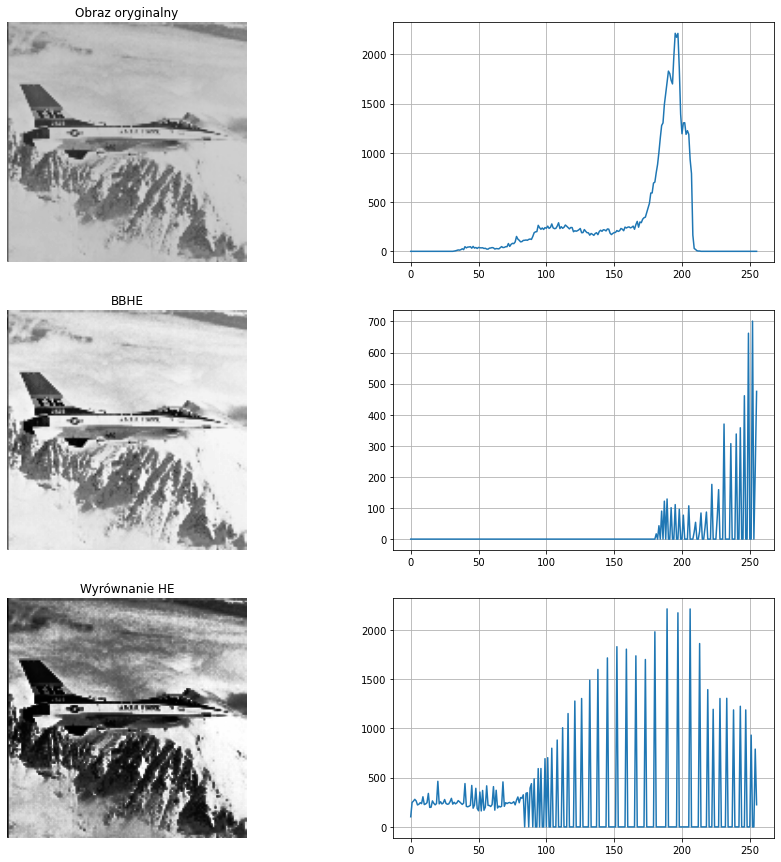

In [5]:
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np

if not os.path.exists("jet.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/03_Histogram/jet.bmp --no-check-certificate


jet = cv2.imread('jet.bmp', cv2.IMREAD_GRAYSCALE)
hist_jet = cv2.calcHist([jet], [0], None, [256], [0, 256])
lm = int(np.mean(jet))



hist_jet_1 = cv2.calcHist([jet], [0], None, [256], [0, lm])
hist_jet_2 = cv2.calcHist([jet], [0], None, [256], [lm+1, 256])
C1 = np.cumsum(hist_jet_1) #hist skumulowane
C2 = np.cumsum(hist_jet_2)

C1 = C1/max(C1) #normalizacja
C2 = C2/max(C2)

C1n = lm*C1 #tworzenie przekształcenia LUT
C2n = lm + 1 + (255 - lm - 1)*C2
C12n = C1n + C2n #łączenie tablicy przekodowań

jet_lut = cv2.LUT(jet, C12n)

figjet, axsjet = plt.subplots(3, 2)
figjet.set_size_inches(15, 15)
axsjet[0, 0].imshow(jet, 'gray', vmin=0, vmax=256)
axsjet[0, 0].axis('off')
axsjet[0, 0].set_title("Obraz oryginalny")
axsjet[1, 0].imshow(jet_lut, 'gray')
axsjet[1, 0].axis('off')
axsjet[1, 0].set_title("BBHE")

img_equal = cv2.equalizeHist(jet)

axsjet[2, 0].imshow(img_equal, 'gray', vmin=0, vmax=256)
axsjet[2, 0].axis('off')
axsjet[2, 0].set_title("Wyrównanie HE")

axsjet[0, 1].plot(hist_jet)
axsjet[0, 1].grid()

axsjet[1, 1].plot(cv2.calcHist([jet_lut], [0], None, [256], [0, 256]))
axsjet[1, 1].grid()

axsjet[2, 1].plot(cv2.calcHist([img_equal], [0], None, [256], [0, 256]))
axsjet[2, 1].grid()

plt.show()

Obraz przekształcony za pomocą BBHE ma znacznie mniejszy kontrast niż uzyskany z przekształcenia BBHE, jednak wciąż większy niz obraz oryginalny. Obraz z BBHE nie jest tak zaciemniony. Także histogram z przekształcenia HE jest bardziej rozłożoy, ponadto wartości maksymalne dla histogramu BBHE są około 3 razy mniejsze niż niż dla obrazu oryginalnego oraz HE.